In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv("telco_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [7]:
# Creating X & y variables
X = df.drop('Churn',axis=1)
y = df['Churn']

In [8]:
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


#### Train Test Split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

The stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

#### Imbalanced Classification SMOTEENN (UpSampling + ENN)

In [10]:
from imblearn.combine import SMOTEENN

SMOTEENN actually is a pipeline that is consisted by SMOTE and EEN. So at first SMOTE generates examples for the minority class. Then ENN probably will try to clean both classes (in case of SMOTEENN), if it can. So in my example SMOTE will make 100 examples per class. Now you have a perfectly balanced set. What do you want to do from there? You can add ENN in the pipeline at the end but probably you'll want to change it's sampling_strategy to all. In that case it will try to clean all classes. So you may remain with a new imbalanced dataset.

In [11]:
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(y_train.value_counts(), np.bincount(y_train_res)) 

0    4130
1    1495
Name: Churn, dtype: int64 [4130 4130]


First we'll do ANOTHER train test split on the training set. We want to make sure that we leave our actual test data (X_test and y_test) alone.

In [12]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_res, y_train_res, test_size=0.33, random_state=20)

In [13]:
def model_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    make_pipeline(StandardScaler(),model).fit(xtrain, ytrain)
    return model.score(xtrain, ytrain), model.score(xtest, ytest)

In [14]:
new_model = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000))
print(model_test(new_model, X_train_2, y_train_2))

(0.4944487477407694, 0.5141481035520771)


In [15]:
def get_scores(model):
    mod = model
    mod = mod.fit(X_train_2, y_train_2)
    predictions = mod.predict(X_test_2)

    print(f'**Model: {mod}**')
    print(f'Train accuracy: {mod.score(X_train_2, y_train_2)}')
    print(f'Test accuracy: {mod.score(X_test_2, y_test_2)}')
    print(f'Precision: {precision_score(y_test_2, predictions)}')
    print(f'Recall: {recall_score(y_test_2, predictions)}')
    print()
    print(classification_report(y_test_2, predictions))
    print()

#### Logistic Regression

In [16]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
model_test(logreg, X_train_2, y_train_2)
get_scores(logreg)

**Model: LogisticRegression(max_iter=1000)**
Train accuracy: 0.8512829779544633
Test accuracy: 0.8561995597945709
Precision: 0.8977923139820114
Recall: 0.8043956043956044

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1361
           1       0.90      0.80      0.85      1365

    accuracy                           0.86      2726
   macro avg       0.86      0.86      0.86      2726
weighted avg       0.86      0.86      0.86      2726




#### Decision Tree Classifier

In [17]:
decision_tree = DecisionTreeClassifier()
model_test(decision_tree, X_train_2, y_train_2)
get_scores(decision_tree)

**Model: DecisionTreeClassifier()**
Train accuracy: 0.9990964943982653
Test accuracy: 0.8019075568598679
Precision: 0.8017556693489393
Recall: 0.802930402930403

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1361
           1       0.80      0.80      0.80      1365

    accuracy                           0.80      2726
   macro avg       0.80      0.80      0.80      2726
weighted avg       0.80      0.80      0.80      2726




#### Random Forest Classifier

In [18]:
random_forest = RandomForestClassifier()
model_test(random_forest, X_train_2, y_train_2)
get_scores(random_forest)

**Model: RandomForestClassifier()**
Train accuracy: 0.9990964943982653
Test accuracy: 0.8503301540719003
Precision: 0.874706342991386
Recall: 0.8183150183150183

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1361
           1       0.87      0.82      0.85      1365

    accuracy                           0.85      2726
   macro avg       0.85      0.85      0.85      2726
weighted avg       0.85      0.85      0.85      2726




#### Gradient Boosting Classifier

In [19]:
grad_boost = GradientBoostingClassifier()
model_test(grad_boost, X_train_2, y_train_2)
get_scores(grad_boost)

**Model: GradientBoostingClassifier()**
Train accuracy: 0.8751355258402602
Test accuracy: 0.8686720469552458
Precision: 0.8811506434519304
Recall: 0.8527472527472527

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1361
           1       0.88      0.85      0.87      1365

    accuracy                           0.87      2726
   macro avg       0.87      0.87      0.87      2726
weighted avg       0.87      0.87      0.87      2726




#### AdaBoost Classifier

In [20]:
ada_boost = AdaBoostClassifier()
model_test(ada_boost, X_train_2, y_train_2)
get_scores(ada_boost)

**Model: AdaBoostClassifier()**
Train accuracy: 0.8512829779544633
Test accuracy: 0.8550990462215701
Precision: 0.8550512445095169
Recall: 0.8556776556776556

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1361
           1       0.86      0.86      0.86      1365

    accuracy                           0.86      2726
   macro avg       0.86      0.86      0.86      2726
weighted avg       0.86      0.86      0.86      2726




#### Linear SVC (Support Vector Classifier)

In [21]:
linearsvc = LinearSVC(max_iter=10000)
model_test(linearsvc, X_train_2, y_train_2)

(0.504002065582236, 0.4918723660445515)

#### SVC with rbf kernel

In [22]:
svc_rbf = SVC(kernel='rbf')
model_test(svc_rbf, X_train_2, y_train_2)

(0.5076168344952233, 0.48344370860927155)

#### SVC with Polynomial kernel

In [23]:
svc_poly = SVC(kernel='poly')
model_test(svc_poly, X_train_2, y_train_2)

(0.5050348567002324, 0.48946417820590005)

#### Naive Bayes Classifier

In [24]:
gaussian_naive_bayes = GaussianNB()
model_test(gaussian_naive_bayes, X_train_2, y_train_2)

(0.4990963077717532, 0.5033112582781457)

### ROC Curve

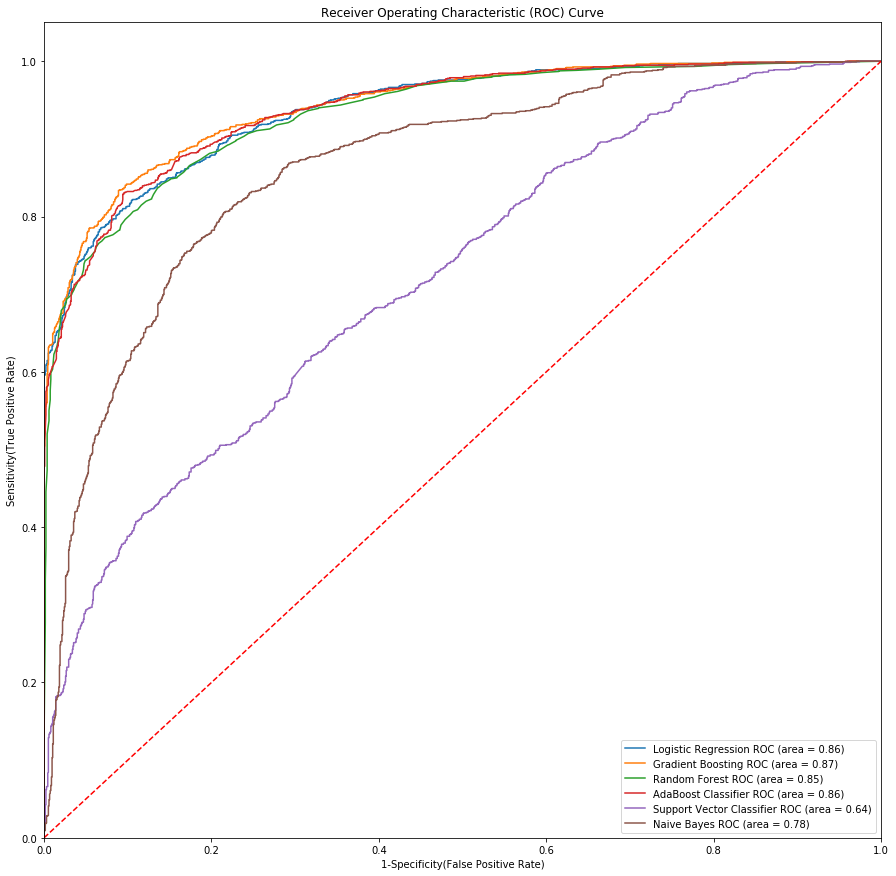

In [25]:
plt.figure(figsize=(15,15))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'AdaBoost Classifier',
    'model': AdaBoostClassifier(),
},
{
    'label': 'Support Vector Classifier',
    'model': SVC(probability=True),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_2, y_train_2) # train the model
    y_pred=model.predict(X_test_2) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test_2, model.predict_proba(X_test_2)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test_2,model.predict(X_test_2))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# plt.savefig('visualizations/ROC_curve.svg')

It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than others. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.

#### RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(10, 50, num = 5)],
               'max_features': ['auto','sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 50, num = 10)],
               'min_samples_split': [int(x) for x in np.linspace(2, 11, num = 9)],
               'min_samples_leaf': [int(x) for x in np.linspace(2, 11, num = 9)],
               'bootstrap': [True, False]}

rf_random = make_pipeline(StandardScaler(),RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               n_iter=500, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               scoring='accuracy',
                               n_jobs = -1))

In [30]:
rf_random.fit(X_train_2, y_train_2)
pred = rf_random.predict(X_test_2)
get_scores(rf_random)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Fitting 3 folds for each of 500 candidates, totalling 1500 fits
**Model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                                    n_iter=500, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 14,
                                                                       18, 23,
                                                                       27, 32,
                                                                       36, 41,
                                                                       45, 50],
                                                         'max_features': ['auto',

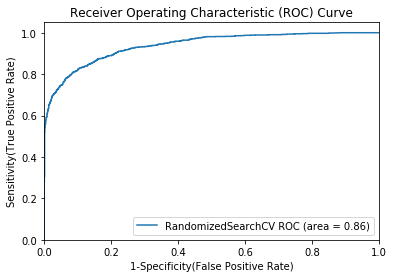

In [41]:
fpr, tpr, thresholds = roc_curve(y_test_2, rf_random.predict_proba(X_test_2)[:,1])
auc = roc_auc_score(y_test_2,rf_random.predict(X_test_2))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandomizedSearchCV', auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AUC for the RandomizedSearchCV ROC curve is same as Logistic Regression

### Pickling the model

In [36]:
import pickle

In [37]:
filename = 'model.sav'

In [38]:
pickle.dump(rf_random, open(filename, 'wb'))

In [39]:
load_model = pickle.load(open(filename, 'rb'))

In [42]:
model_score_r1 = load_model.score(X_test_2, y_test_2)

In [43]:
model_score_r1

0.859501100513573